In [2]:
pip install scikit-learn pandas numpy matplotlib seaborn nltk

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 442.8 kB/s eta 0:00:17
   -- ------------------------------------- 0.5/8.0 MB 442.8 kB/s eta 0:00:17
   -- ------------------------------------- 0.5/8.0 MB 442.8 kB/s eta 0:00:17
   --- ------------------------------------ 0.8/8.0 MB 390.8 kB/s eta 0:00:19
   --- ------------------------------------ 0.8/8.0 MB 390.8 kB/s eta 0:00:19
   --- ------------------------------------ 0.8/8.0 MB 390.8 kB/s eta 0:00:19
   ----- ---------------------------------- 1.0/8

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


SPAM EMAIL CLASSIFICATION SYSTEM
Loading and preparing dataset...
Dataset loaded: 5572 emails
Spam: 747, Ham: 4825
Preprocessing text data...
Training set: 4457 emails
Testing set: 1115 emails

Training models...
Naive Bayes: Cross validation Accuracy = 0.9630
SVM: Cross validation Accuracy = 0.9825
Random Forest: Cross validation Accuracy = 0.9760

Best model selected: SVC

Evaluating model...
Test Accuracy: 0.9830

Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       0.98      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[963   3]
 [ 16 133]]


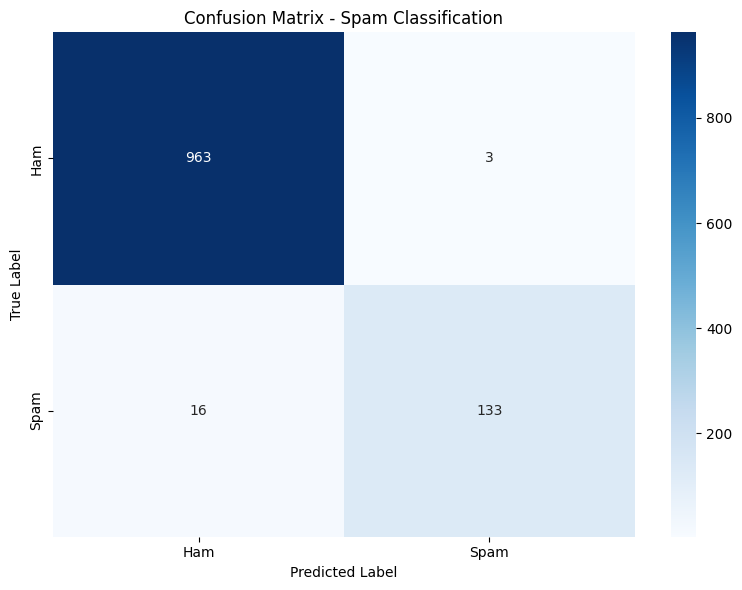


TESTING WITH NEW EMAILS

Email: Free lottery! Win millions now....
Prediction: SPAM
Spam Probability: 100.00%
----------------------------------------

Email: Meeting rescheduled to 4 PM tomorrow....
Prediction: HAM
Spam Probability: 1.57%
----------------------------------------

Email: Your bank account needs immediate attention....
Prediction: HAM
Spam Probability: 14.50%
----------------------------------------

Email: Lunch at the usual place?...
Prediction: HAM
Spam Probability: 0.03%
----------------------------------------

Email: Congratulations! You are our lucky winner....
Prediction: HAM
Spam Probability: 26.58%
----------------------------------------

TASK 1 COMPLETED SUCCESSFULLY!


In [1]:
"""
Spam Email Classification System
Name : MUHAMMAD DAIL CHOWHAN
Email : dailchowhan@gmail.com
Date: 2 January'2026
Intern ID : ARCH-2610-0765
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings('ignore')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

class EmailSpamClassifier:
    def __init__(self):
        """Initialize the spam classifier"""
        self.vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
        self.classifier = None
        self.accuracy = 0
        self.report = None
        
    def load_data(self):
        """
        Load and prepare the spam dataset
        Using SMS Spam Collection Dataset (similar structure to emails)
        """
        print("Loading and preparing dataset...")
        
        df = pd.read_csv("spam.csv", encoding="latin-1")
        df = df[['v1', 'v2']]
        df.columns = ['label', 'text']
        df['label'] = df['label'].map({'spam': 1, 'ham': 0})
        
        
        print(f"Dataset loaded: {len(df)} emails")
        print(f"Spam: {df['label'].sum()}, Ham: {len(df) - df['label'].sum()}")
        
        return df
    
    def preprocess_text(self, text):
        """Clean and preprocess email text"""
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
        
        return ' '.join(words)
    
    def prepare_features(self, df):
        """Prepare features for training"""
        print("Preprocessing text data...")
        df['cleaned_text'] = df['text'].apply(self.preprocess_text)
        
        X = df['cleaned_text']
        y = df['label']
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print(f"Training set: {len(X_train)} emails")
        print(f"Testing set: {len(X_test)} emails")
        
        return X_train, X_test, y_train, y_test
    
    def train_model(self, X_train, y_train):
        """Train and evaluate multiple models"""
        print("\nTraining models...")
        
        models = {
            'Naive Bayes': MultinomialNB(),
            'SVM': SVC(kernel='linear', probability=True),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
        }
        
        best_model = None
        best_score = 0
        results = {}
        
        for name, model in models.items():
            pipeline = Pipeline([
                ('vectorizer', self.vectorizer),
                ('classifier', model)
            ])
            
            pipeline.fit(X_train, y_train)
            
            cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
            avg_cv_score = cv_scores.mean()
            
            results[name] = {
                'model': pipeline,
                'cv_score': avg_cv_score
            }
            
            print(f"{name}: Cross validation Accuracy = {avg_cv_score:.4f}")
            
            if avg_cv_score > best_score:
                best_score = avg_cv_score
                best_model = pipeline
        
        self.classifier = best_model
        print(f"\nBest model selected: {type(best_model.named_steps['classifier']).__name__}")
        
        return results
    
    def evaluate_model(self, X_test, y_test):
        """Evaluate model performance"""
        print("\nEvaluating model...")
        y_pred = self.classifier.predict(X_test)
        self.accuracy = accuracy_score(y_test, y_pred)
        print(f"Test Accuracy: {self.accuracy:.4f}")
        self.report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])
        print("\nClassification Report:")
        print(self.report)
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)

        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=['Ham', 'Spam'], 
                   yticklabels=['Ham', 'Spam'])
        plt.title('Confusion Matrix - Spam Classification')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.savefig('confusion_matrix_spam.png', dpi=300)
        plt.show()
        
        return self.accuracy, self.report
    
    def predict_new_email(self, email_text):
        """Predict if a new email is spam or ham"""
        if self.classifier is None:
            raise ValueError("Model not trained yet. Please train the model first.")
        
        prediction = self.classifier.predict([email_text])
        probability = self.classifier.predict_proba([email_text])
        
        result = "SPAM" if prediction[0] == 1 else "HAM"
        spam_prob = probability[0][1] * 100
        
        print(f"\nEmail: {email_text[:100]}...")
        print(f"Prediction: {result}")
        print(f"Spam Probability: {spam_prob:.2f}%")
        
        return result, spam_prob
    
    def feature_importance(self):
        """Show most important features for spam detection"""
        if isinstance(self.classifier.named_steps['classifier'], MultinomialNB):
            feature_names = self.vectorizer.get_feature_names_out()
            coef = self.classifier.named_steps['classifier'].feature_log_prob_[1]
            
            top_indices = np.argsort(coef)[-20:]
            top_features = feature_names[top_indices]
            top_scores = coef[top_indices]
            
            print("\nTop 20 Spam Indicators:")
            for feature, score in zip(top_features, top_scores):
                print(f"{feature}: {score:.4f}")
            
            return top_features, top_scores

def main():
    """Main execution function"""
    print("=" * 60)
    print("SPAM EMAIL CLASSIFICATION SYSTEM")
    print("=" * 60)
    
    classifier = EmailSpamClassifier()
    df = classifier.load_data()
    X_train, X_test, y_train, y_test = classifier.prepare_features(df)
    results = classifier.train_model(X_train, y_train)
    accuracy, report = classifier.evaluate_model(X_test, y_test)

    print("\n" + "=" * 60)
    print("TESTING WITH NEW EMAILS")
    print("=" * 60)
    
    test_emails = [
        "Free lottery! Win millions now.",
        "Meeting rescheduled to 4 PM tomorrow.",
        "Your bank account needs immediate attention.",
        "Lunch at the usual place?",
        "Congratulations! You are our lucky winner."
    ]
    
    for email in test_emails:
        classifier.predict_new_email(email)
        print("-" * 40)
    
    classifier.feature_importance()
    
    print("\n" + "=" * 60)
    print("TASK 1 COMPLETED SUCCESSFULLY!")
    print("=" * 60)

if __name__ == "__main__":
    main()